<a href="https://colab.research.google.com/github/aekanun2020/Data-Analytics-using-Python/blob/main/from_Solution_Homework_to_Regression_withNOSCALER_and_Dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
! wget https://storage.googleapis.com/1sep/2008.csv

--2023-10-23 08:58:29--  https://storage.googleapis.com/1sep/2008.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.207, 142.251.16.207, 172.253.62.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689413344 (657M) [text/csv]
Saving to: ‘2008.csv’

2008.csv            100%[===================>] 657.48M  43.7MB/s    in 14s     

2023-10-23 08:58:43 (46.8 MB/s) - ‘2008.csv’ saved [689413344/689413344]



In [4]:
! wc -l 2008.csv

7009729 2008.csv


In [5]:
f = "2008.csv"
num_lines = sum(1 for l in open(f))
size = int(num_lines / 100)
import random
skip_idx = random.sample(range(1, num_lines), num_lines - size)
raw_pd = pd.read_csv(f, skiprows=skip_idx)

In [6]:
#raw_pd = pd.read_csv("2008.csv")

In [7]:
raw_pd.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,715.0,715,720.0,710,WN,1016,...,7.0,21.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,...,4.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,16.0
2,2008,1,3,4,1634.0,1555,1859.0,1845,WN,3480,...,5.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1053.0,1055,1245.0,1240,WN,433,...,7.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,2049.0,1920,106.0,2355,WN,875,...,2.0,10.0,0,NaN,0,32.0,0.0,0.0,0.0,39.0


In [8]:
raw_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70096 entries, 0 to 70095
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70096 non-null  int64  
 1   Month              70096 non-null  int64  
 2   DayofMonth         70096 non-null  int64  
 3   DayOfWeek          70096 non-null  int64  
 4   DepTime            68753 non-null  float64
 5   CRSDepTime         70096 non-null  int64  
 6   ArrTime            68573 non-null  float64
 7   CRSArrTime         70096 non-null  int64  
 8   UniqueCarrier      70096 non-null  object 
 9   FlightNum          70096 non-null  int64  
 10  TailNum            69259 non-null  object 
 11  ActualElapsedTime  68537 non-null  float64
 12  CRSElapsedTime     70086 non-null  float64
 13  AirTime            68537 non-null  float64
 14  ArrDelay           68537 non-null  float64
 15  DepDelay           68753 non-null  float64
 16  Origin             700

In [9]:
raw_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,70096.0,2008.000000,0.000000,2008.0,2008.00,2008.0,2008.00,2008.0
Month,70096.0,6.401507,3.408883,1.0,3.00,6.0,9.00,12.0
DayofMonth,70096.0,15.720740,8.778438,1.0,8.00,16.0,23.00,31.0
DayOfWeek,70096.0,3.933077,1.994296,1.0,2.00,4.0,6.00,7.0
DepTime,68753.0,1335.512559,477.598083,1.0,930.00,1327.0,1728.00,2400.0
CRSDepTime,70096.0,1327.800659,463.594085,1.0,929.00,1320.0,1715.00,2359.0
ArrTime,68573.0,1483.727167,504.983826,1.0,1108.00,1515.0,1910.00,2400.0
CRSArrTime,70096.0,1497.348066,482.238981,1.0,1116.00,1520.0,1909.00,2400.0
FlightNum,70096.0,2227.113501,1960.355177,1.0,623.75,1575.0,3524.25,7829.0
ActualElapsedTime,68537.0,127.370647,70.334787,17.0,76.00,110.0,157.00,664.0


In [10]:
## เตรียมข้อมูลสำหรับการวิเคราะห์หา C.V.

describe_pd = pd.DataFrame(raw_pd.describe().transpose())

describe_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, Year to LateAircraftDelay
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   24 non-null     float64
 1   mean    24 non-null     float64
 2   std     24 non-null     float64
 3   min     24 non-null     float64
 4   25%     24 non-null     float64
 5   50%     24 non-null     float64
 6   75%     24 non-null     float64
 7   max     24 non-null     float64
dtypes: float64(8)
memory usage: 2.2+ KB


In [11]:
## ดู Dispersion จาก C.V.

#describe_pd['std'].apply(lambda x: x/100)
describe_pd.assign(cv=lambda x: ((100/x['mean'])*x['std']))[['mean','std','cv']]
#df.assign(Discount_Percent=lambda x: (100/x.Fee)*x.Discount)

,mean,std,cv
Year,2008.000000,0.000000,0.000000
Month,6.401507,3.408883,53.251269
DayofMonth,15.720740,8.778438,55.839849
DayOfWeek,3.933077,1.994296,50.705745
DepTime,1335.512559,477.598083,35.761407
CRSDepTime,1327.800659,463.594085,34.914434
ArrTime,1483.727167,504.983826,34.034817
CRSArrTime,1497.348066,482.238981,32.206205
FlightNum,2227.113501,1960.355177,88.022239
ActualElapsedTime,127.370647,70.334787,55.220562


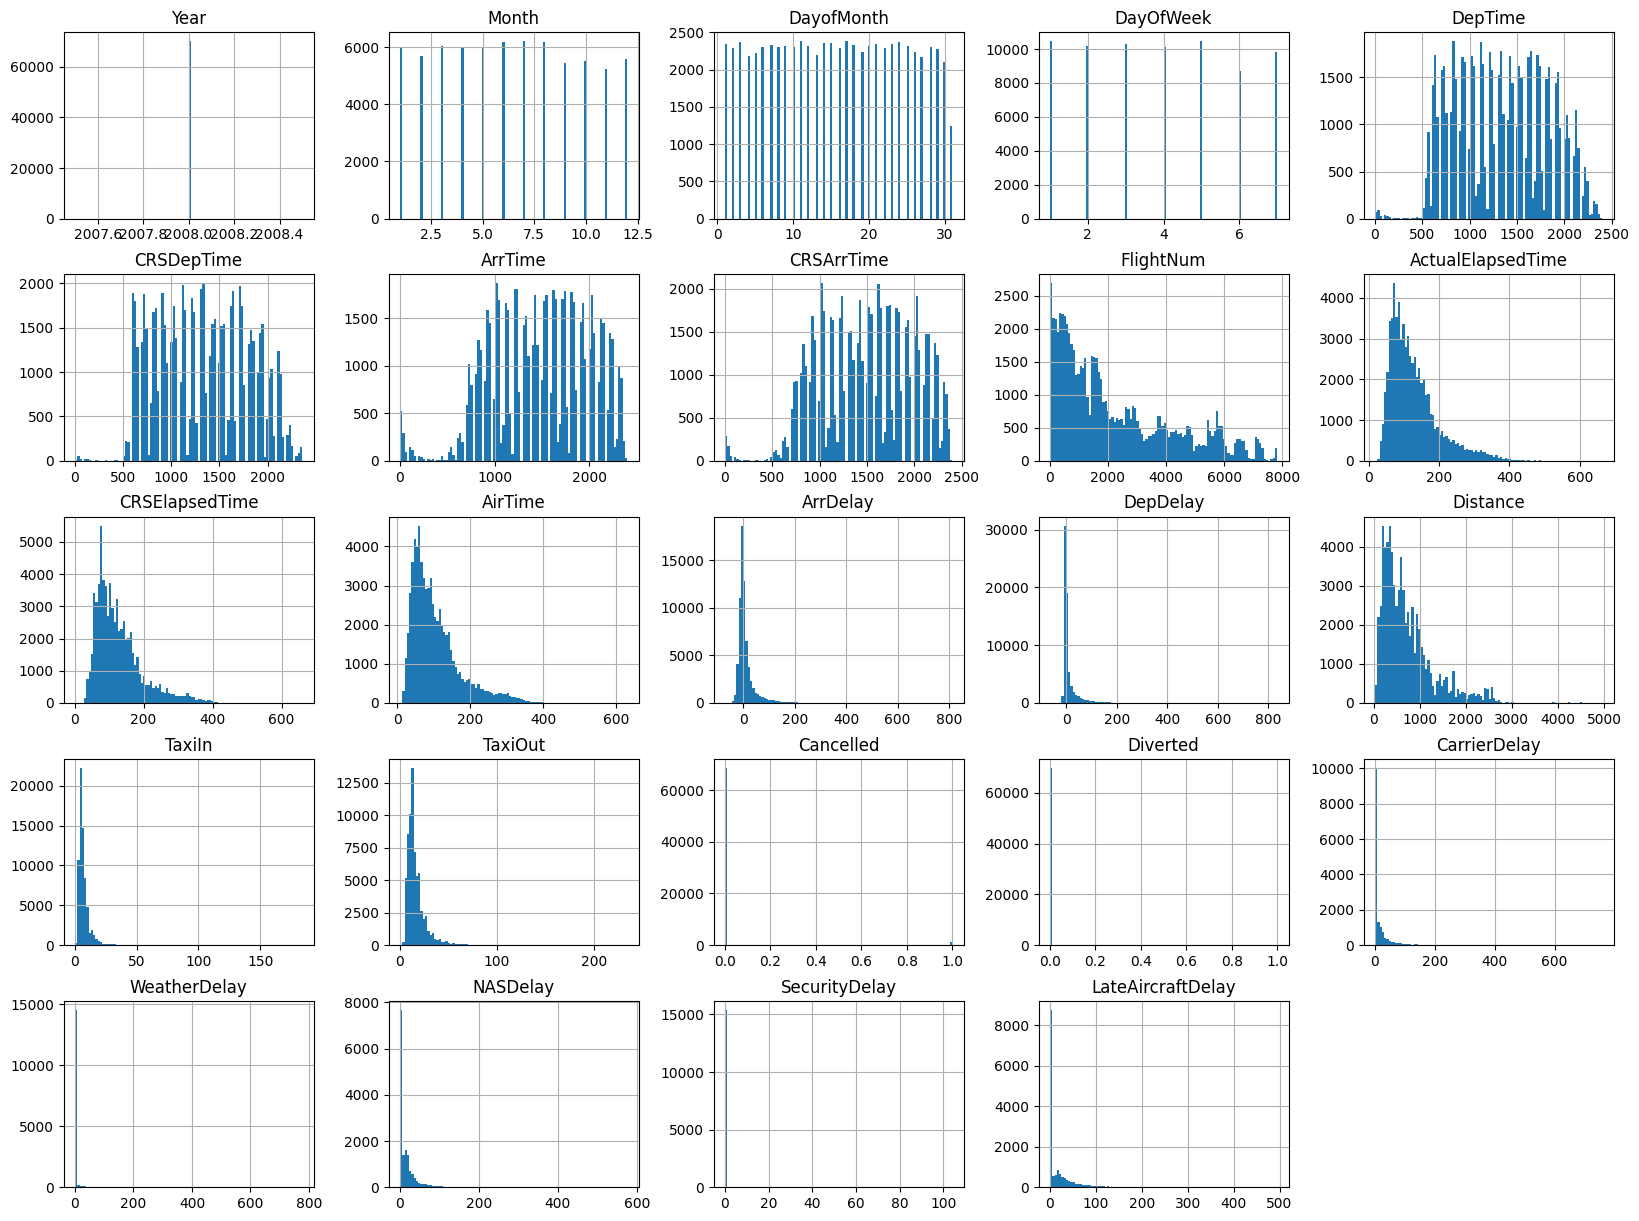

In [12]:
## ดู Distribution ของแต่ละ column

raw_pd.hist(bins=100, figsize=(20,15))
plt.show()

In [13]:
categorical = list(raw_pd.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(raw_pd.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
Numerical columns are: ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [14]:
# Redefine numerical based on raw_pd
numerical_final = list(raw_pd.select_dtypes('number').columns)

# Now compute the correlation
correlation_final = raw_pd[numerical_final].corr()['ArrDelay'].sort_values(ascending=False)
print(correlation_final)


ArrDelay             1.000000
DepDelay             0.930399
LateAircraftDelay    0.505294
CarrierDelay         0.463404
NASDelay             0.382795
TaxiOut              0.331905
WeatherDelay         0.290093
DepTime              0.177396
TaxiIn               0.124180
CRSDepTime           0.114162
CRSArrTime           0.112837
ActualElapsedTime    0.096392
ArrTime              0.063964
AirTime              0.035506
CRSElapsedTime       0.016114
FlightNum            0.014701
DayOfWeek            0.012121
Distance             0.008915
DayofMonth          -0.003442
SecurityDelay       -0.004845
Month               -0.037909
Year                      NaN
Cancelled                 NaN
Diverted                  NaN
Name: ArrDelay, dtype: float64


In [15]:
print(numerical)

['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [16]:
print(numerical_final)

['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [17]:
# Redefine numerical based on raw_pd
# numerical_final = list(raw_pd.select_dtypes('number').columns)

# Now compute the correlation
correlation_final = raw_pd[numerical].corr()['ArrDelay'].sort_values(ascending=False)
print(correlation_final)


ArrDelay             1.000000
DepDelay             0.930399
LateAircraftDelay    0.505294
CarrierDelay         0.463404
NASDelay             0.382795
TaxiOut              0.331905
WeatherDelay         0.290093
DepTime              0.177396
TaxiIn               0.124180
CRSDepTime           0.114162
CRSArrTime           0.112837
ActualElapsedTime    0.096392
ArrTime              0.063964
AirTime              0.035506
CRSElapsedTime       0.016114
FlightNum            0.014701
DayOfWeek            0.012121
Distance             0.008915
DayofMonth          -0.003442
SecurityDelay       -0.004845
Month               -0.037909
Year                      NaN
Cancelled                 NaN
Diverted                  NaN
Name: ArrDelay, dtype: float64


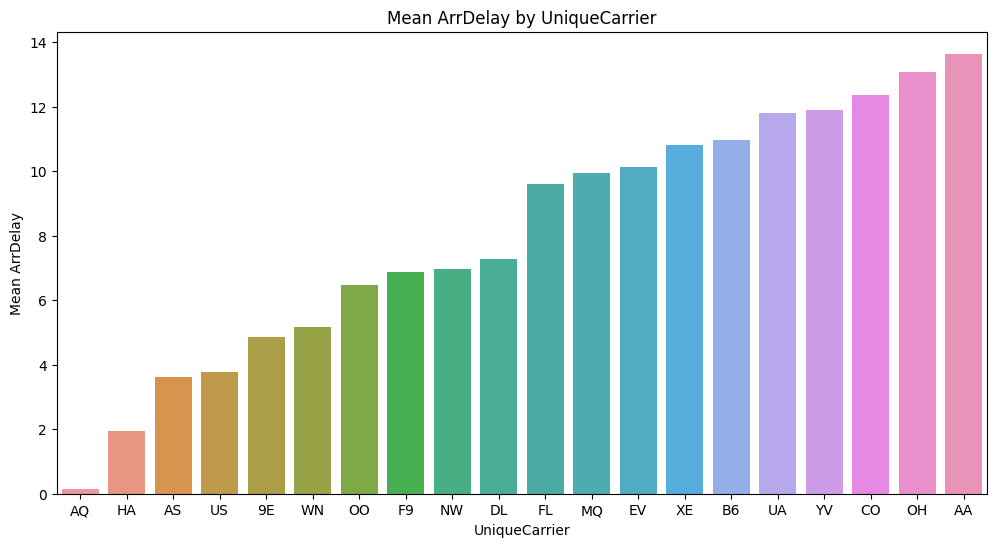

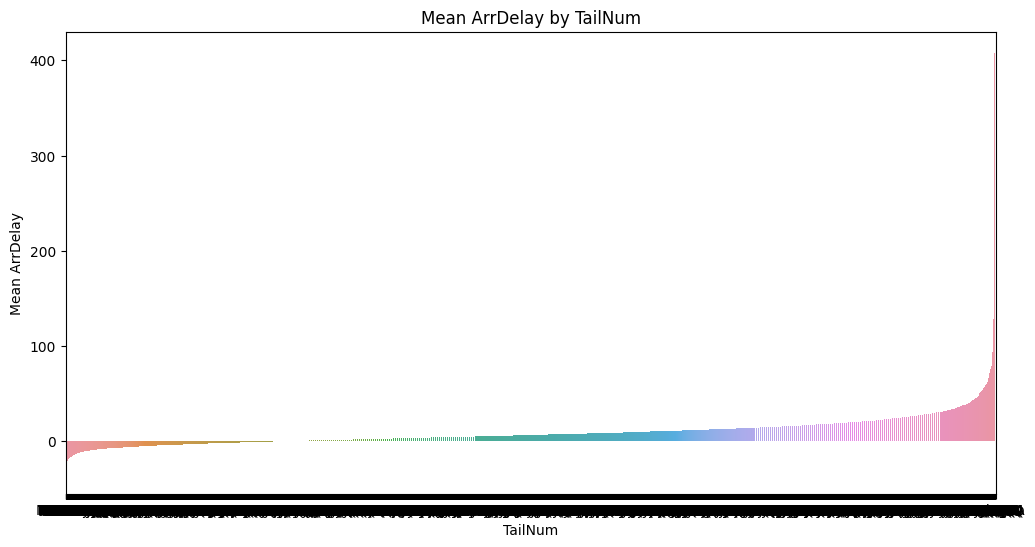

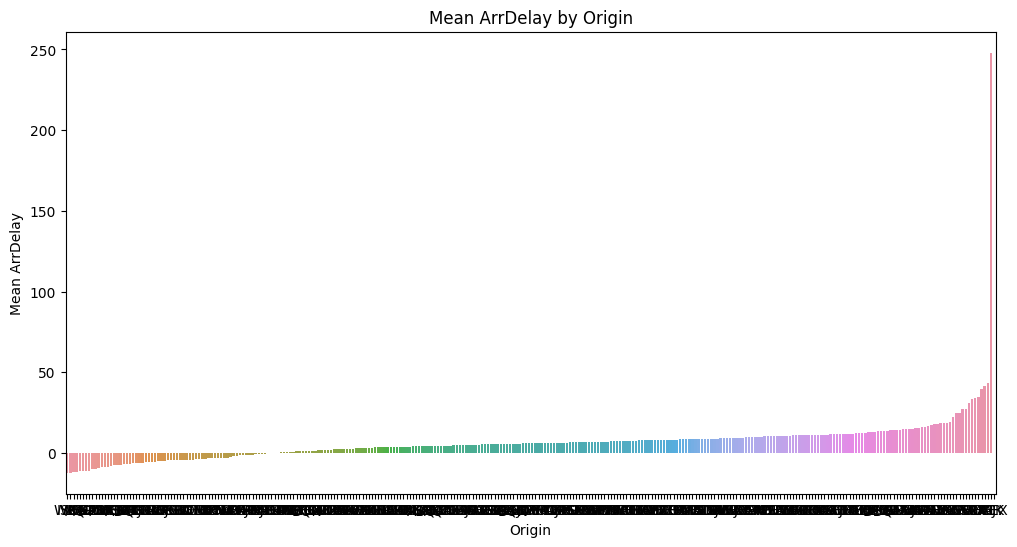

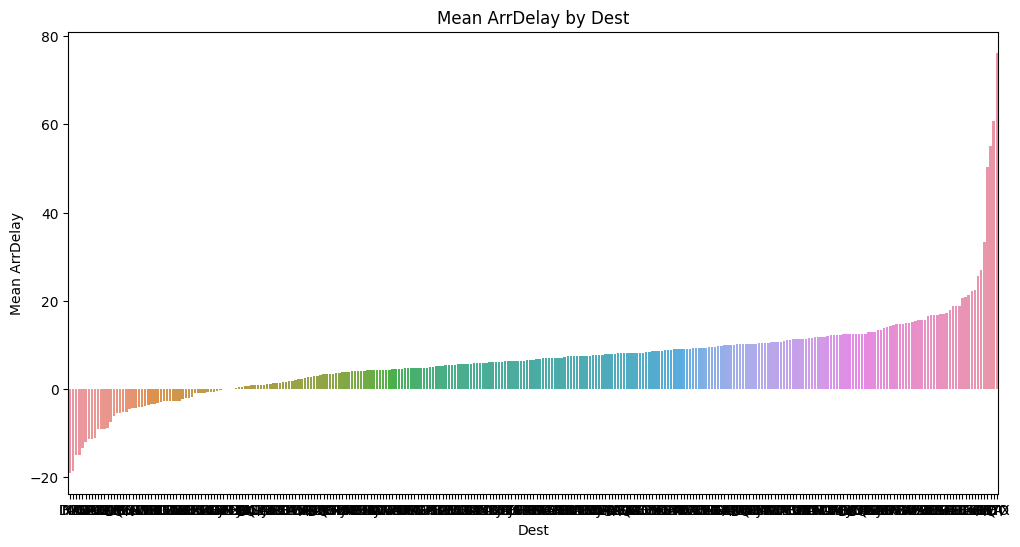

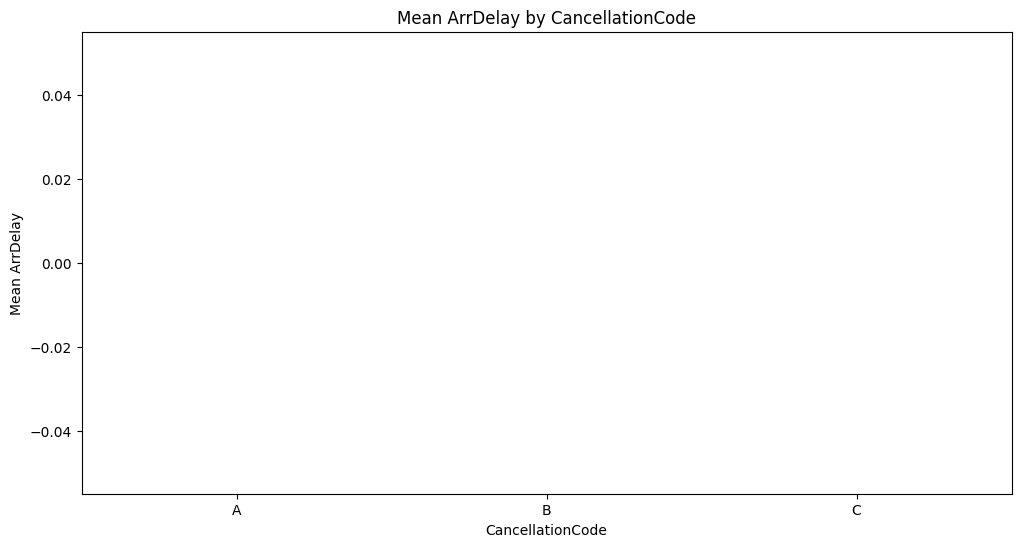

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical:
    group_means = raw_pd.groupby(col)['ArrDelay'].mean().sort_values()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=group_means.index, y=group_means.values)
    plt.title(f'Mean ArrDelay by {col}')
    plt.ylabel('Mean ArrDelay')
    plt.show()


In [19]:
## Feature Engineering, Model Training and Evaluation

In [20]:
def t_timeperiod(origin):
    if origin is None:
        period = None
    elif origin > 0 and origin < 600:
        period = '00.01-05.59'
    elif origin >= 600 and origin <=1200:
        period = '06.00-11.59'
    elif origin >= 1200 and origin <= 1800:
        period = '12.00-17.59'
    elif origin >= 1800 and origin <= 2400:
        period = '18.00-24.00'
    else:
        period = 'NA'
    return period

In [21]:
raw_pd['DepTime'] = raw_pd['DepTime'].apply(lambda x:t_timeperiod(x))

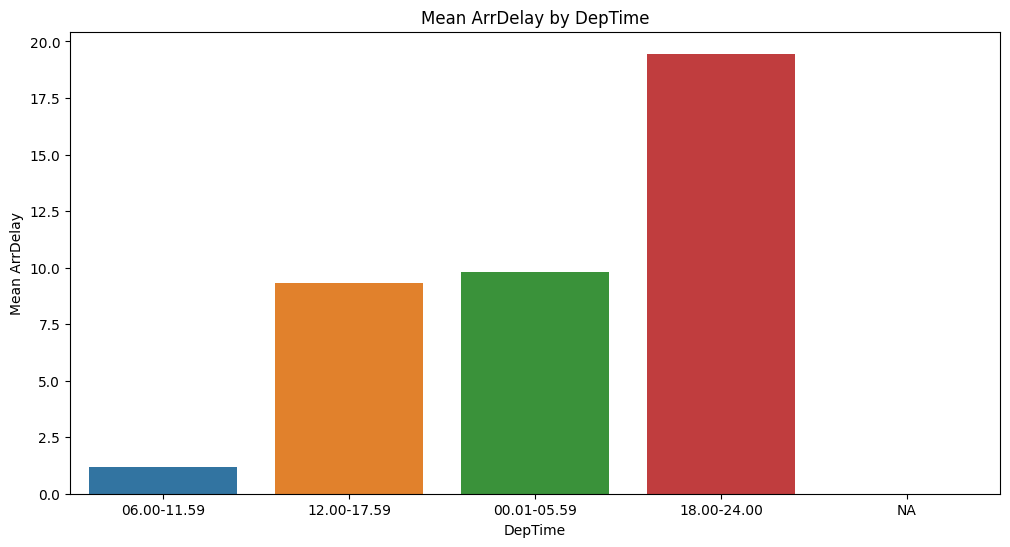

In [22]:
group_means = raw_pd.groupby('DepTime')['ArrDelay'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=group_means.index, y=group_means.values)
plt.title(f'Mean ArrDelay by DepTime')
plt.ylabel('Mean ArrDelay')
plt.show()

In [23]:
features_pd = raw_pd[[
        'DepTime','DepDelay','UniqueCarrier',\
        'ArrDelay']]

In [24]:
features_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DepDelay,68753.0,10.126162,35.110274,-64.0,-5.0,-1.0,8.0,835.0
ArrDelay,68537.0,8.423538,38.132867,-72.0,-10.0,-2.0,12.0,813.0


In [25]:
#features_pd.groupby('UniqueCarrier')['ArrDelay'].mean().to_frame()

In [26]:
features_pd['Is_AQ'] = (features_pd['UniqueCarrier'] == 'AQ').astype(int)
print(features_pd.head())

       DepTime  DepDelay UniqueCarrier  ArrDelay  Is_AQ
0  06.00-11.59       0.0            WN      10.0      0
1  12.00-17.59      28.0            WN      16.0      0
2  12.00-17.59      39.0            WN      14.0      0
3  06.00-11.59      -2.0            WN       5.0      0
4  18.00-24.00      89.0            WN      71.0      0


<ipython-input-26-3a50ab777a7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_pd['Is_AQ'] = (features_pd['UniqueCarrier'] == 'AQ').astype(int)


features_pd = raw_pd[['UniqueCarrier','Origin','Dest',\
        'DepTime','TaxiOut','TaxiIn','DepDelay',\
        'DayOfWeek','Distance','ArrDelay']]

In [27]:
features_pd

,DepTime,DepDelay,UniqueCarrier,ArrDelay,Is_AQ
0,06.00-11.59,0.0,WN,10.0,0
1,12.00-17.59,28.0,WN,16.0,0
2,12.00-17.59,39.0,WN,14.0,0
3,06.00-11.59,-2.0,WN,5.0,0
4,18.00-24.00,89.0,WN,71.0,0
...,...,...,...,...,...
70091,06.00-11.59,5.0,DL,6.0,0
70092,18.00-24.00,-4.0,DL,-9.0,0
70093,12.00-17.59,-10.0,DL,-25.0,0
70094,06.00-11.59,3.0,DL,-8.0,0


In [28]:
# Create dummy columns for DepTime
dummies = pd.get_dummies(features_pd['DepTime'], prefix='DepTime')

# Concatenate the dummy columns with the original DataFrame
features_pd_with_dummies = pd.concat([features_pd, dummies], axis=1)

# Optionally, drop the original DepTime column
features_pd_with_dummies = features_pd_with_dummies.drop('DepTime', axis=1)

# Display the resulting DataFrame
print(features_pd_with_dummies.head())


   DepDelay UniqueCarrier  ArrDelay  Is_AQ  DepTime_00.01-05.59  \
0       0.0            WN      10.0      0                    0   
1      28.0            WN      16.0      0                    0   
2      39.0            WN      14.0      0                    0   
3      -2.0            WN       5.0      0                    0   
4      89.0            WN      71.0      0                    0   

   DepTime_06.00-11.59  DepTime_12.00-17.59  DepTime_18.00-24.00  DepTime_NA  
0                    1                    0                    0           0  
1                    0                    1                    0           0  
2                    0                    1                    0           0  
3                    1                    0                    0           0  
4                    0                    0                    1           0  


In [29]:
final_pd = features_pd_with_dummies.drop(columns='DepTime_NA').drop(columns='UniqueCarrier').dropna()

In [30]:
final_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68537 entries, 0 to 70095
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DepDelay             68537 non-null  float64
 1   ArrDelay             68537 non-null  float64
 2   Is_AQ                68537 non-null  int64  
 3   DepTime_00.01-05.59  68537 non-null  uint8  
 4   DepTime_06.00-11.59  68537 non-null  uint8  
 5   DepTime_12.00-17.59  68537 non-null  uint8  
 6   DepTime_18.00-24.00  68537 non-null  uint8  
dtypes: float64(2), int64(1), uint8(4)
memory usage: 2.4 MB


In [31]:
final_pd

,DepDelay,ArrDelay,Is_AQ,DepTime_00.01-05.59,DepTime_06.00-11.59,DepTime_12.00-17.59,DepTime_18.00-24.00
0,0.0,10.0,0,0,1,0,0
1,28.0,16.0,0,0,0,1,0
2,39.0,14.0,0,0,0,1,0
3,-2.0,5.0,0,0,1,0,0
4,89.0,71.0,0,0,0,0,1
...,...,...,...,...,...,...,...
70091,5.0,6.0,0,0,1,0,0
70092,-4.0,-9.0,0,0,0,0,1
70093,-10.0,-25.0,0,0,0,1,0
70094,3.0,-8.0,0,0,1,0,0


In [32]:
import pandas as pd
from seaborn import load_dataset
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [33]:
train_df = final_pd.sample(frac=0.8,random_state=123)

In [34]:
test_df = final_pd.drop(train_df.index)

In [35]:
train_df.count()

DepDelay               54830
ArrDelay               54830
Is_AQ                  54830
DepTime_00.01-05.59    54830
DepTime_06.00-11.59    54830
DepTime_12.00-17.59    54830
DepTime_18.00-24.00    54830
dtype: int64

In [36]:
test_df.count()

DepDelay               13707
ArrDelay               13707
Is_AQ                  13707
DepTime_00.01-05.59    13707
DepTime_06.00-11.59    13707
DepTime_12.00-17.59    13707
DepTime_18.00-24.00    13707
dtype: int64

In [37]:
train_labels = train_df.filter(['ArrDelay'])
train_df = train_df.loc[:, train_df.columns != 'ArrDelay']

In [38]:
type(train_labels)

pandas.core.frame.DataFrame

In [39]:
test_labels = test_df.filter(['ArrDelay'])
test_df = test_df.loc[:, test_df.columns != 'ArrDelay']

In [40]:
X_train = train_df
X_test = test_df
y_train = train_labels
y_test = test_labels

In [41]:
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: []
Numerical columns are: ['DepDelay', 'Is_AQ', 'DepTime_00.01-05.59', 'DepTime_06.00-11.59', 'DepTime_12.00-17.59', 'DepTime_18.00-24.00']


In [42]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [43]:
# Define custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

# Define categorical pipeline
#cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
#                     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical))
                     #('imputer', SimpleImputer(strategy='median')),
                     #('scaler', MinMaxScaler())
                    ])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[
    #('cat', cat_pipe),
                                              ('num', num_pipe)])

# Model Training
pipe = Pipeline(steps=[('preprocessor', preprocessor),
              ('model', DecisionTreeRegressor())])
pipeline_model = pipe.fit(X_train, y_train)

In [44]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = pipeline_model.predict(X_test)
print("\t RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("\t R2 score:", r2_score(y_test, predictions))

	 RMSE: 14.640652103265383
	 R2 score: 0.8624645653879643
